In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### load data and clean any nulls

In [2]:
data_pd_raw = pd.read_csv('./seinfeld_pd.csv', index_col=0)
data_pd_raw.dropna()

,title,price,used,city,date,shipping,link
0,Lego Zestaw Nr 21328 Seinfeld,250,True,"Warszawa, Targówek",02 listopada 2023,False,olx.pl/d/oferta/lego-zestaw-nr-21328-seinfeld-...
1,Lego 21328 Seinfeld,240,False,"Warszawa, Mokotów",10 listopada 2023,False,olx.pl/d/oferta/lego-21328-seinfeld-CID88-IDU4...
2,Lego Seinfeld 21328,240,True,"Warszawa, Wola",16 listopada 2023,True,olx.pl/d/oferta/lego-seinfeld-21328-CID4042-ID...
3,Funko Pop Seinfeld 1096 Jerry #3,35,False,Brzana,16 listopada 2023,True,olx.pl/d/oferta/funko-pop-seinfeld-1096-jerry-...
4,Funko Pop Seinfeld 1094 George (Holistic) #2,40,False,Brzana,16 listopada 2023,True,olx.pl/d/oferta/funko-pop-seinfeld-1094-george...
5,Funko Pop Seinfeld 1094 George (Holistic) #1,40,False,Brzana,16 listopada 2023,True,olx.pl/d/oferta/funko-pop-seinfeld-1094-george...
6,Funko Pop Seinfeld 1096 Jerry #3,35,False,Brzana,16 listopada 2023,True,olx.pl/d/oferta/funko-pop-seinfeld-1096-jerry-...
7,Funko Pop Seinfeld 1096 Jerry #2,35,False,Brzana,16 listopada 2023,True,olx.pl/d/oferta/funko-pop-seinfeld-1096-jerry-...
8,LEGO Ideas 21328 Seinfeld,250,False,"Warszawa, Wola",03 listopada 2023,False,olx.pl/d/oferta/lego-ideas-21328-seinfeld-CID8...
9,Lego 21328 Seinfeld OKAZJA!,220,False,Orzech,31 października 2023,False,olx.pl/d/oferta/lego-21328-seinfeld-okazja-CID...


In [3]:
print(f'columns: {data_pd_raw.columns}')

columns: Index(['title', 'price', 'used', 'city', 'date', 'shipping', 'link'], dtype='object')


### Drop non-seinfeld data

In [5]:
# non_sein = data_pd.loc[~data_pd['title'].str.contains('seinfeld', case=False)]
data_pd = data_pd_raw.loc[data_pd_raw['title'].str.contains('seinfeld', case=False)]

### Split into categories

In [6]:
# 3 categories we're interested in
lego_rows = data_pd.loc[data_pd['title'].str.contains('lego', case=False)]
funko_rows = data_pd.loc[data_pd['title'].str.contains('funko', case=False)]
dvd_rows = data_pd.loc[data_pd['title'].str.contains('dvd', case=False)]

### explore lego prices spread

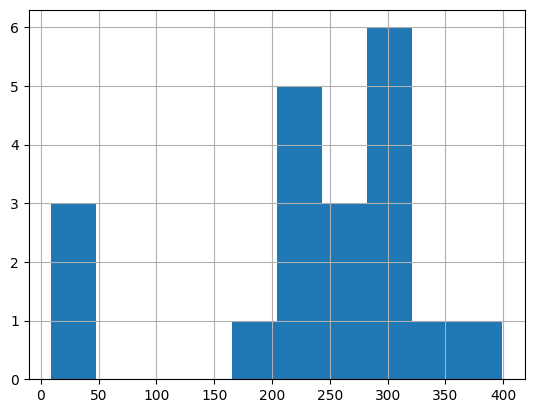

In [17]:
lego_prices = lego_rows['price']
lego_prices_hist = lego_prices.hist()

In [8]:
print(lego_prices.describe())

count     20.000000
mean     237.350000
std      104.688146
min        9.000000
25%      220.000000
50%      250.000000
75%      300.000000
max      399.000000
Name: price, dtype: float64


In [9]:
plt.show()

### [LEGO] - cut off low prices, filter by city or with shipping

In [18]:
my_city = 'łódź'

In [11]:
filtered_lego = lego_rows.loc[lego_rows['price'].gt(100)
                                & ( lego_rows['city'].str.contains(my_city, case=False)
                                   | lego_rows['shipping'] == True
                                   )]

In [12]:
print('filtered lego')
print(filtered_lego.describe())

filtered lego
            price
count    9.000000
mean   288.222222
std     63.322148
min    200.000000
25%    240.000000
50%    285.000000
75%    320.000000
max    399.000000


### Split between new and used sets

In [13]:
filtered_new = filtered_lego.loc[filtered_lego['used'] == False]
filtered_used = filtered_lego.loc[filtered_lego['used'] == True]

In [14]:
print(filtered_new.count())
print(filtered_used.count())

title       5
price       5
used        5
city        5
date        5
shipping    5
link        5
dtype: int64
title       4
price       4
used        4
city        4
date        4
shipping    4
link        4
dtype: int64


#### Is there a perfect match (in Lodz)

In [15]:
print(filtered_lego.loc[filtered_lego['city'].str.contains(my_city, case=False)].any())

title       False
price       False
used        False
city        False
date        False
shipping    False
link        False
dtype: bool


### Min. price in new sets

In [ ]:
min_filtered_price = filtered_new[filtered_new['price'] == filtered_new['price'].max()]
print(min_filtered_price)

In [21]:
# filtered_lego.plot()